In [14]:
import json
import numpy as np
import pandas as pd
import csv
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, auc, roc_curve, roc_auc_score


In [2]:
data = pd.read_pickle("synergy_carry_value_df_encoded.pkl")

In [7]:
data_train, data_test = train_test_split(data,shuffle=True,random_state=6453,test_size=.2)

In [17]:
features = list(data.columns)[:-5]
avg_roc = []
avg_acc = []
kfold = KFold(n_splits=5, shuffle = True, random_state=6453)
for i in range(5,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    temp_roc = []
    temp_acc = []
    counter = 0
    for train_index, validate_index in kfold.split(data_train):
        data_train_train = data_train.iloc[train_index,:]
        data_train_val = data_train.iloc[validate_index,:]

        X = data_train_train[features]
        knn.fit(X, data_train_train["Top 4"])
        Y_knn_pred = knn.predict(data_train_val[features])
        Y_knn_proba = knn.predict_proba(data_train_val[features])

        temp_acc.append(accuracy_score(data_train_val["Top 4"], Y_knn_pred))
        temp_roc.append(roc_auc_score(data_train_val["Top 4"], Y_knn_proba[:,1]))
    avg_roc.append(np.average(temp_roc))
    avg_acc.append(np.average(temp_acc))
    print("KNN with neighbors = " + str(i))

0
1
2
3
4
KNN with neighbors = 5
0
1
2
3
4
KNN with neighbors = 6
0
1
2
3
4
KNN with neighbors = 7
0
1
2
3
4
KNN with neighbors = 8
0
1
2
3
4
KNN with neighbors = 9
0
1
2
3
4
KNN with neighbors = 10
0
1
2
3
4
KNN with neighbors = 11
0
1
2
3
4
KNN with neighbors = 12
0
1
2
3
4
KNN with neighbors = 13
0
1
2
3
4
KNN with neighbors = 14
0
1
2
3
4
KNN with neighbors = 15
0
1
2
3
4
KNN with neighbors = 16
0
1
2
3
4
KNN with neighbors = 17
0
1
2
3
4
KNN with neighbors = 18
0
1
2
3
4
KNN with neighbors = 19
0
1
2
3
4
KNN with neighbors = 20


KeyboardInterrupt: 

In [18]:
knn_cross_val_mse

[0.7742218787070373,
 0.7726179175888951,
 0.7799707950567593,
 0.7778772086385755,
 0.7829423459547726,
 0.7821572512261157,
 0.7853398356305211,
 0.784191750956318,
 0.7868678203107053,
 0.7860742960289854,
 0.78776266420712,
 0.7873574598637005,
 0.7883535977194932,
 0.7884464564246267,
 0.7888178908888372,
 0.7884886701098524]

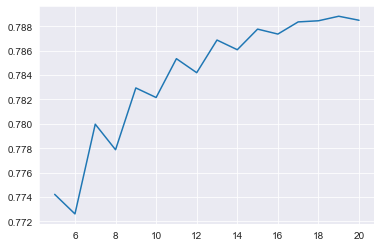

In [19]:
plt.plot(range(5,21), knn_cross_val_mse)

In [25]:
## Seems like n = 19 works
knn = KNeighborsClassifier(n_neighbors=19)
kfold = KFold(n_splits=5, shuffle = True, random_state=6453)
temp_roc = []
temp_acc = []


for train_index, validate_index in kfold.split(data_train):
    data_train_train = data_train.iloc[train_index,:]
    data_train_val = data_train.iloc[validate_index,:]

    X = data_train_train[features]
    knn.fit(X, data_train_train["Top 4"])
    Y_knn_pred = knn.predict(data_train_val[features])
    Y_knn_proba = knn.predict_proba(data_train_val[features])

    temp_acc.append(accuracy_score(data_train_val["Top 4"], Y_knn_pred))
    temp_roc.append(roc_auc_score(data_train_val["Top 4"], Y_knn_proba[:,1]))

print(np.average(temp_acc))
print(np.average(temp_roc))

0.7888178908888372
0.8711153556084849
